In [16]:
import pandas as pd
from lbsa.sentistrength_id import SentiStrengthID
senti = SentiStrengthID()

Load Data

In [17]:
filename = 'facial-wash-sampled.csv'

raw_data = pd.read_csv(filename)
raw_data

,id,product_id,username,age_range,skin_type,rating,text,is_recommended,price
0,1297294,42201,agirlllll,18 and Under,Combination,2.0,Karena cocok sama krimnya jadi berharap fwnya ...,-1,12500.0
1,1661314,3895,hnnymtra,18 and Under,Combination,2.0,dengan claim nya yang mampu menyembuhkan jeraw...,-1,29000.0
2,1952835,2462,azkiasalwa,18 and Under,Combination,2.0,aku heran kok masih ada aja facewash dgn physi...,-1,18000.0
3,1512349,3502,ptrdwita,18 and Under,Combination,1.0,skincare ter worst yg pernah aku coba sii. awa...,-1,15000.0
4,1872288,11125,babysoo,18 and Under,Combination,4.0,"aku pake ini pas breakout, buat nyembuhin jera...",-1,22000.0
...,...,...,...,...,...,...,...,...,...
1929,1795263,600,rimaandarachmania,45 and Above,Combination,4.0,"first time aku pakai ini,untuk facial wash nya...",1,24000.0
1930,179331,41446,reginarosa,45 and Above,Dry,5.0,aku pernah coba versi yg ada tube nya. waktu p...,0,15000.0
1931,977002,2623,L1nd44lw1,45 and Above,Normal,5.0,"Cleanser yg plg gw suka krn bagus, lembut dan ...",0,635000.0
1932,237798,16288,aflowerlikeu,45 and Above,Oily,1.0,Beli ini karena kebetulan facial wash yg aku p...,0,30000.0


Preprocessing Data

In [18]:
cleaned_data = raw_data.dropna()
cleaned_data = cleaned_data[cleaned_data.is_recommended != 0]
cleaned_data.skin_type.replace(r"(.*) Skin", r"\1", inplace=True, regex=True)
cleaned_data

,id,product_id,username,age_range,skin_type,rating,text,is_recommended,price
0,1297294,42201,agirlllll,18 and Under,Combination,2.0,Karena cocok sama krimnya jadi berharap fwnya ...,-1,12500.0
1,1661314,3895,hnnymtra,18 and Under,Combination,2.0,dengan claim nya yang mampu menyembuhkan jeraw...,-1,29000.0
2,1952835,2462,azkiasalwa,18 and Under,Combination,2.0,aku heran kok masih ada aja facewash dgn physi...,-1,18000.0
3,1512349,3502,ptrdwita,18 and Under,Combination,1.0,skincare ter worst yg pernah aku coba sii. awa...,-1,15000.0
4,1872288,11125,babysoo,18 and Under,Combination,4.0,"aku pake ini pas breakout, buat nyembuhin jera...",-1,22000.0
...,...,...,...,...,...,...,...,...,...
1922,2001426,53924,niarizki,40 - 44,Combination,4.0,secinta itu sih aku sama brand ini karena mema...,1,90000.0
1923,1437529,15484,mirawidiastuti,40 - 44,Combination,4.0,"Sebagai pemilik kulit sensitif, mencari skinca...",1,400000.0
1925,2527990,45469,radhiani,40 - 44,Dry,4.0,lembut ya pasta nya enak banget di sapukan ke ...,1,28500.0
1926,2276136,94131,Whuatik,40 - 44,Oily,5.0,"Awal pegang busa aja udah lgs jatuh cinta, sel...",1,128000.0


Melakukan Lexicon-based Sentiment Analysis

In [19]:
def process(row):
    row['rating_text'], row['processed_text'] = senti.score(row['text'])
    return row

processed_data = cleaned_data.apply(process, axis=1)
processed_data

,id,product_id,username,age_range,skin_type,rating,text,is_recommended,price,rating_text,processed_text
0,1297294,42201,agirlllll,18 and Under,Combination,2.0,Karena cocok sama krimnya jadi berharap fwnya ...,-1,12500.0,2.876984,karena cocok [3] sama krimnya jadi berharap [-...
1,1661314,3895,hnnymtra,18 and Under,Combination,2.0,dengan claim nya yang mampu menyembuhkan jeraw...,-1,29000.0,2.648810,dengan claim nya yang mampu [4] menyembuhkan j...
2,1952835,2462,azkiasalwa,18 and Under,Combination,2.0,aku heran kok masih ada aja facewash dgn physi...,-1,18000.0,2.767857,aku heran kok [-2] masih ada aja facewash dgn ...
3,1512349,3502,ptrdwita,18 and Under,Combination,1.0,skincare ter worst yg pernah aku coba sii. awa...,-1,15000.0,0.000000,skincare ter worst yg pernah aku coba sii awal...
4,1872288,11125,babysoo,18 and Under,Combination,4.0,"aku pake ini pas breakout, buat nyembuhin jera...",-1,22000.0,3.184524,aku pake ini pas breakout buat nyembuhin jera...
...,...,...,...,...,...,...,...,...,...,...,...
1922,2001426,53924,niarizki,40 - 44,Combination,4.0,secinta itu sih aku sama brand ini karena mema...,1,90000.0,3.541667,secinta itu sih aku sama brand ini karena mema...
1923,1437529,15484,mirawidiastuti,40 - 44,Combination,4.0,"Sebagai pemilik kulit sensitif, mencari skinca...",1,400000.0,2.658730,sebagai pemilik kulit sensitif [-2] mencari s...
1925,2527990,45469,radhiani,40 - 44,Dry,4.0,lembut ya pasta nya enak banget di sapukan ke ...,1,28500.0,3.928571,lembut [4] ya pasta nya enak [5] banget di sap...
1926,2276136,94131,Whuatik,40 - 44,Oily,5.0,"Awal pegang busa aja udah lgs jatuh cinta, sel...",1,128000.0,3.000000,awal pegang busa aja udah lgs jatuh [-3] cinta...


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, precision_recall_fscore_support
from matplotlib import pyplot as plt

Training Model
Data Train Decision Tree Regression 1 

In [26]:
X = processed_data[['product_id', 'age_range', 'skin_type']]
X = pd.get_dummies(X)
y = processed_data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dtr1_train = X_train.merge(y_train, left_index=True, right_index=True)
dtr1_train

,product_id,age_range_18 and Under,age_range_19 - 24,age_range_25 - 29,age_range_30 - 34,age_range_35 - 39,age_range_40 - 44,age_range_45 and Above,skin_type_Combination,skin_type_Dry,skin_type_Normal,skin_type_Oily,rating
1262,18286,0,0,1,0,0,0,0,1,0,0,0,5.0
1669,18517,0,0,1,0,0,0,0,0,0,0,1,3.0
631,89336,0,1,0,0,0,0,0,1,0,0,0,5.0
544,42450,0,1,0,0,0,0,0,1,0,0,0,5.0
1251,80510,0,0,1,0,0,0,0,1,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,81521,0,0,1,0,0,0,0,0,0,1,0,5.0
1546,11125,0,0,1,0,0,0,0,0,0,0,1,3.0
1798,86692,0,0,0,1,0,0,0,0,1,0,0,5.0
1159,53114,0,0,1,0,0,0,0,1,0,0,0,1.0


Data Testing Decision Tree Regression 1

In [27]:
dtr1_test = X_test.merge(y_test, left_index=True, right_index=True)
dtr1_test

,product_id,age_range_18 and Under,age_range_19 - 24,age_range_25 - 29,age_range_30 - 34,age_range_35 - 39,age_range_40 - 44,age_range_45 and Above,skin_type_Combination,skin_type_Dry,skin_type_Normal,skin_type_Oily,rating
1362,12723,0,0,1,0,0,0,0,1,0,0,0,5.0
407,208,0,1,0,0,0,0,0,1,0,0,0,5.0
221,69300,1,0,0,0,0,0,0,0,0,0,1,4.0
1285,15317,0,0,1,0,0,0,0,1,0,0,0,5.0
77,17949,1,0,0,0,0,0,0,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,4765,0,1,0,0,0,0,0,1,0,0,0,2.0
1315,86864,0,0,1,0,0,0,0,1,0,0,0,5.0
1827,73758,0,0,0,1,0,0,0,0,0,1,0,4.0
547,74054,0,1,0,0,0,0,0,1,0,0,0,5.0


Hasil Pengujian Decision Treee Regression 1

In [28]:
y_pred = model.predict(X_test)
dtr1_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dtr1_compare

,Actual,Predicted
1362,5.0,5.0
407,5.0,3.0
221,4.0,5.0
1285,5.0,4.0
77,3.0,5.0
...,...,...
459,2.0,2.0
1315,5.0,5.0
1827,4.0,2.0
547,5.0,4.0


In [29]:
r2_1 = r2_score(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)
r2_1, mae1


(-0.39034061655610586, 0.8493925849521518)

Data Train Decision Tree Regression 2

In [31]:
X = processed_data[['product_id', 'age_range', 'skin_type']]
y = processed_data['rating_text']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dtr2_train = X_train.merge(y_train, left_index=True, right_index=True)
dtr2_train

,product_id,age_range_18 and Under,age_range_19 - 24,age_range_25 - 29,age_range_30 - 34,age_range_35 - 39,age_range_40 - 44,age_range_45 and Above,skin_type_Combination,skin_type_Dry,skin_type_Normal,skin_type_Oily,rating_text
1262,18286,0,0,1,0,0,0,0,1,0,0,0,3.571429
1669,18517,0,0,1,0,0,0,0,0,0,0,1,2.842262
631,89336,0,1,0,0,0,0,0,1,0,0,0,3.348214
544,42450,0,1,0,0,0,0,0,1,0,0,0,2.874150
1251,80510,0,0,1,0,0,0,0,1,0,0,0,3.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,81521,0,0,1,0,0,0,0,0,0,1,0,2.991071
1546,11125,0,0,1,0,0,0,0,0,0,0,1,2.083333
1798,86692,0,0,0,1,0,0,0,0,1,0,0,3.303571
1159,53114,0,0,1,0,0,0,0,1,0,0,0,3.660714


Data Test Decision Tree Regression 2

In [32]:
dtr2_test = X_test.merge(y_test, left_index=True, right_index=True)
dtr2_test

,product_id,age_range_18 and Under,age_range_19 - 24,age_range_25 - 29,age_range_30 - 34,age_range_35 - 39,age_range_40 - 44,age_range_45 and Above,skin_type_Combination,skin_type_Dry,skin_type_Normal,skin_type_Oily,rating_text
1362,12723,0,0,1,0,0,0,0,1,0,0,0,4.017857
407,208,0,1,0,0,0,0,0,1,0,0,0,3.482143
221,69300,1,0,0,0,0,0,0,0,0,0,1,2.976190
1285,15317,0,0,1,0,0,0,0,1,0,0,0,3.571429
77,17949,1,0,0,0,0,0,0,1,0,0,0,3.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,4765,0,1,0,0,0,0,0,1,0,0,0,2.767857
1315,86864,0,0,1,0,0,0,0,1,0,0,0,2.857143
1827,73758,0,0,0,1,0,0,0,0,0,1,0,3.044218
547,74054,0,1,0,0,0,0,0,1,0,0,0,3.285714


Hasil Pengujian Decision Tree Regression 2

In [33]:
y_pred = model.predict(X_test)
dtr2_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dtr2_compare

,Actual,Predicted
1362,4.017857,3.030754
407,3.482143,3.482143
221,2.976190,3.571429
1285,3.571429,2.767857
77,3.125000,1.357143
...,...,...
459,2.767857,2.857143
1315,2.857143,3.273810
1827,3.044218,3.258929
547,3.285714,3.214286


In [34]:
r2_2 = r2_score(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)
r2_2, mae2

(-1.5044103021749473, 0.7274409161980074)

Data Train SVM

In [37]:
X = processed_data[['rating', 'rating_text']]
y = processed_data['is_recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)

svm_train = X_train.merge(y_train, left_index=True, right_index=True)
svm_train

,rating,rating_text,is_recommended
1262,5.0,3.571429,1
1669,3.0,2.842262,1
631,5.0,3.348214,1
544,5.0,2.874150,1
1251,5.0,3.214286,1
...,...,...,...
1508,5.0,2.991071,1
1546,3.0,2.083333,-1
1798,5.0,3.303571,1
1159,1.0,3.660714,-1


Data Test SVM

In [38]:
svm_test = X_test.merge(y_test, left_index=True, right_index=True)
svm_test

,rating,rating_text,is_recommended
1362,5.0,4.017857,1
407,5.0,3.482143,1
221,4.0,2.976190,1
1285,5.0,3.571429,1
77,3.0,3.125000,1
...,...,...,...
459,2.0,2.767857,1
1315,5.0,2.857143,1
1827,4.0,3.044218,1
547,5.0,3.285714,1


Hasil Pengujian SVM

In [39]:
y_pred = model.predict(X_test)
svm_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
svm_compare

,Actual,Predicted
1362,1,1
407,1,1
221,1,1
1285,1,1
77,1,-1
...,...,...
459,1,-1
1315,1,1
1827,1,1
547,1,1


In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy, precision, recall, f1_score

(0.9097472924187726,
 0.9339318232644324,
 0.9097472924187726,
 0.9171368531247833)

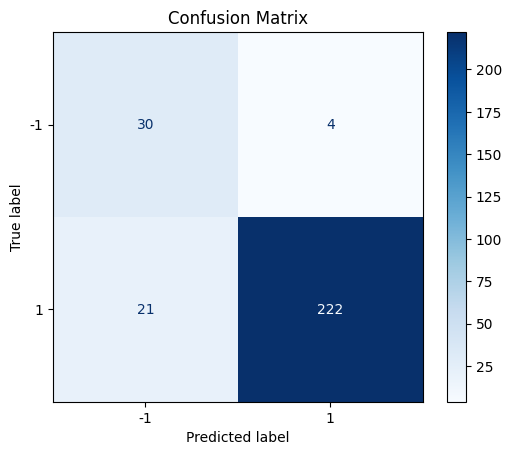

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp = disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()